In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset

df = pd.read_csv('train.csv')

In [3]:
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# checking if we have nulls > 80%

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df['percent_missing'] > 80]

,column_name,percent_missing
Alley,Alley,93.767123
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


In [6]:
# dropping columns having nulls > 80%

limitPer = len(df) * 0.20
df.dropna(thresh=limitPer, axis=1, inplace = True)

In [7]:
# Imputing Nulls

df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)

df['FireplaceQu'].fillna('No_Fireplace', inplace = True)

df['GarageType'].fillna('No_Garage_type', inplace = True)

df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace = True)

df['GarageFinish'].fillna('No_Garage_finsihed', inplace = True)

df['GarageCond'].fillna('No_Garage_cond', inplace = True)

#df['GarageQual'].fillna('No_Garage_qual', inplace = True)

df['BsmtExposure'].fillna('NA_BsmtExposure', inplace = True)

#df['BsmtFinType2'].fillna('NA_BsmtFinType2', inplace = True)

#df['BsmtQual'].fillna('NA_BsmtQual', inplace = True)

df['BsmtCond'].fillna('NA_BsmtCond', inplace = True)

df['BsmtFinType1'].fillna('NA_BsmtFinType1', inplace = True)

df['MasVnrType'].fillna('None', inplace = True)

df['MasVnrArea'].fillna(0, inplace = True)
# None is the type, so is the value

df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)

In [8]:
# dropping these columns as quality and condition seem similar from description

df.drop(['GarageQual', 'BsmtQual', 'BsmtFinType2', 'ExterQual'], axis = 1, inplace = True)

In [9]:
# these columns have the same values, it will be a problem when we craete dummy's for categorical to numerical
# Therefore replacing them with suffixes

df['ExterCond'] = df['ExterCond'].apply(lambda x: x + '_ExterCond')
df['HeatingQC'] = df['HeatingQC'].apply(lambda x: x + '_HeatingQC')
df['GarageCond'] = df['GarageCond'].apply(lambda x: x + '_GarageCond')
df['FireplaceQu'] = df['FireplaceQu'].apply(lambda x: x + '_FireplaceQu')
df['KitchenQual'] = df['KitchenQual'].apply(lambda x: x + '_KitchenQual')
df['BsmtCond'] = df['BsmtCond'].apply(lambda x: x + '_BsmtCond')

In [10]:
def num_to_str_col(col):
    '''
    Function to change the non ordinal columns to string columns
    '''
    if col == 20:
        return '1_STORY_1946_NEWER_ALL_STYLES'
    elif col == 30:
        return '1_STORY_1945_OLDER'
    elif col == 40:
        return '1_STORY_W_FINISHED_ATTIC_ALL_AGES'
    elif col == 45:
        return '1_1_2_STORY_UNFINISHED_ALL_AGES'
    elif col == 50:
        return '1_1_2_STORY_FINISHED_ALL_AGES'
    elif col == 60:
        return '2_STORY_1946_NEWER'
    elif col == 70:
        return '2_STORY_1945_OLDER'
    elif col == 75:
        return '2_1_2_STORY_ALL_AGES'
    elif col == 80:
        return 'SPLIT_OR_MULTI_LEVEL'
    elif col == 85:
        return 'SPLIT_OYER'
    elif col == 90:
        return 'DUPLEX_ALL_STYLES_AND_AGES'
    elif col == 120:
        return '1_STORY_PUD_Planned_Unit_Development_1946_NEWER'
    elif col == 150:
        return '1_1_2_STORY_PUD_ALL_AGES'
    elif col == 160:
        return '2_STORY_PUD_1946_NEWER'
    elif col == 180:
        return 'PUD_MULTILEVEL_INCL_SPLIT_LEV_FOYER'
    else:
        return 'FAMILY_CONVERSION_ALL_STYLES_AGES'

In [11]:
df['MSSubClass'] = df['MSSubClass'].apply(lambda x : num_to_str_col(x))

Id


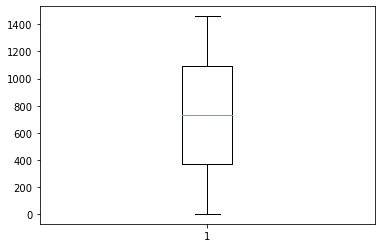

LotFrontage


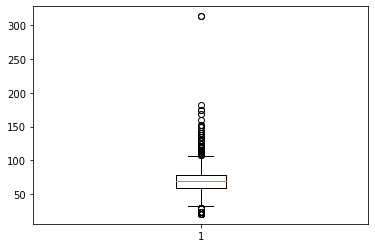

LotArea


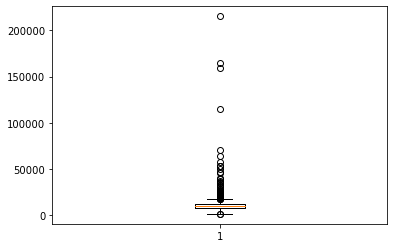

OverallQual


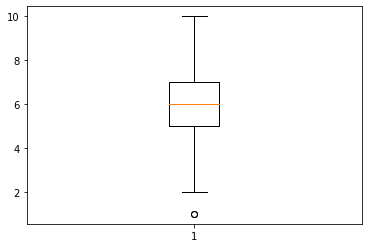

OverallCond


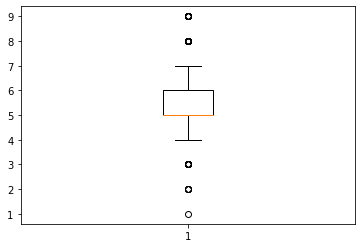

YearBuilt


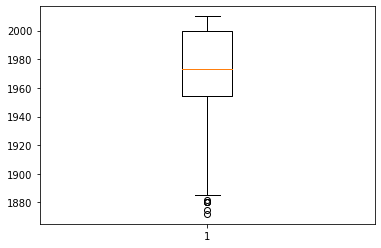

YearRemodAdd


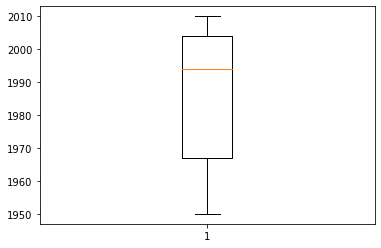

MasVnrArea


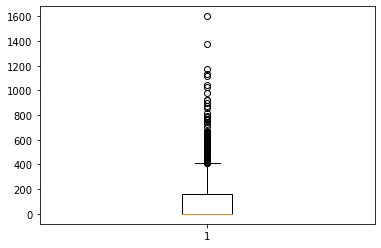

BsmtFinSF1


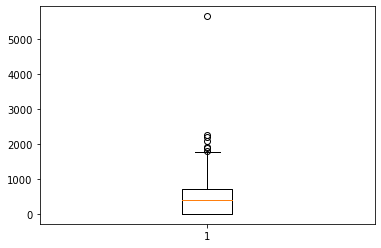

BsmtFinSF2


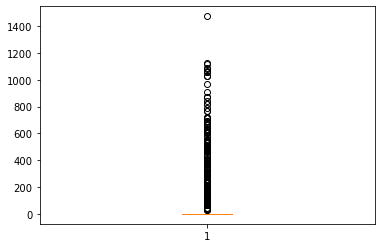

BsmtUnfSF


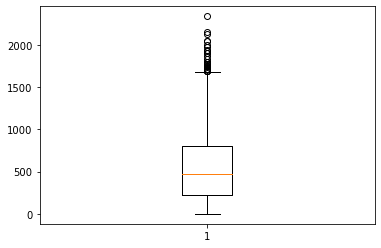

TotalBsmtSF


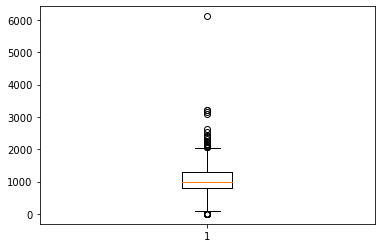

1stFlrSF


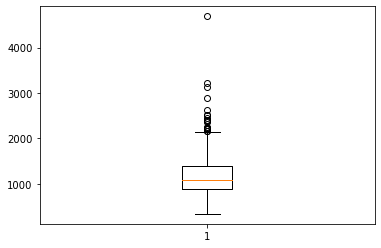

2ndFlrSF


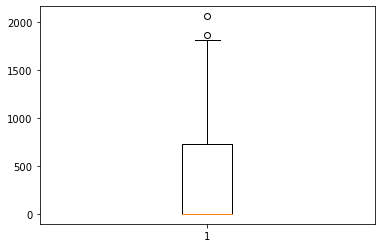

LowQualFinSF


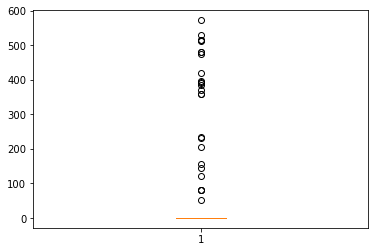

GrLivArea


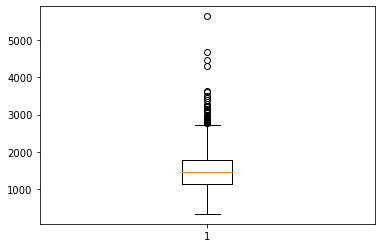

BsmtFullBath


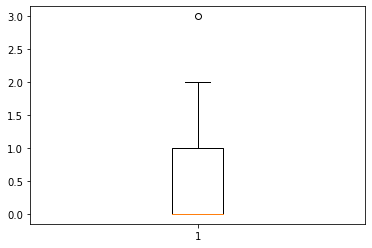

BsmtHalfBath


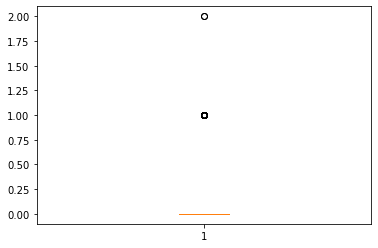

FullBath


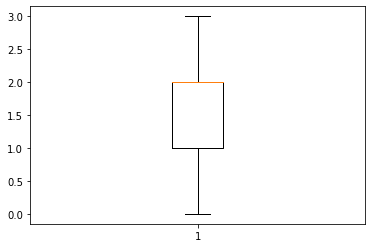

HalfBath


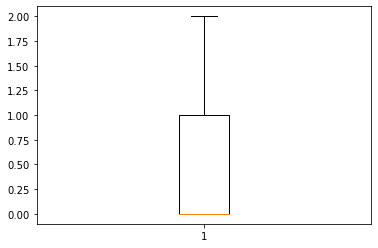

BedroomAbvGr


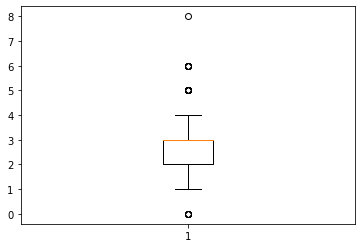

KitchenAbvGr


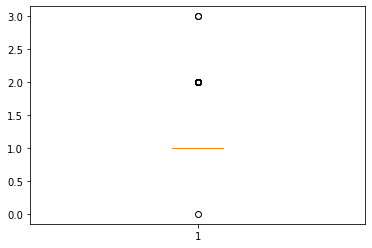

TotRmsAbvGrd


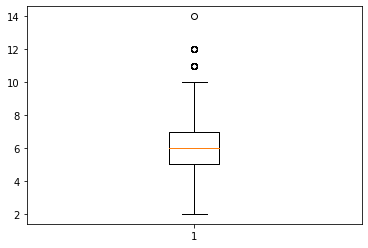

Fireplaces


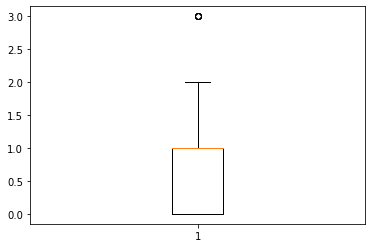

GarageYrBlt


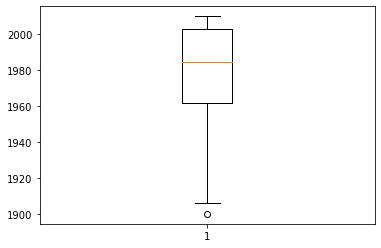

GarageCars


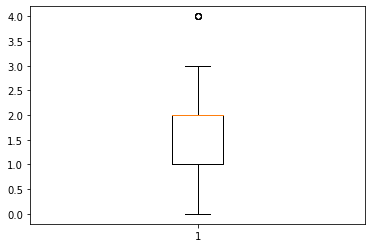

GarageArea


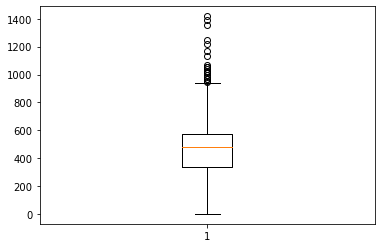

WoodDeckSF


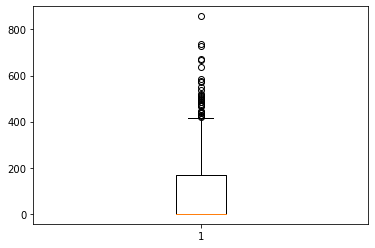

OpenPorchSF


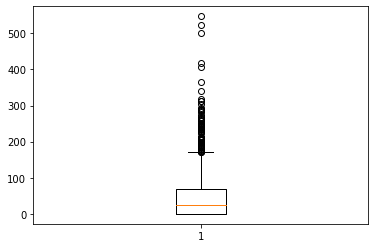

EnclosedPorch


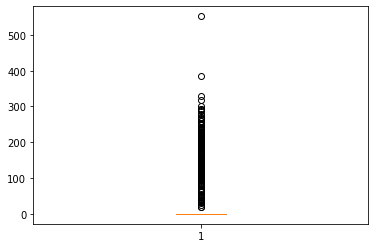

3SsnPorch


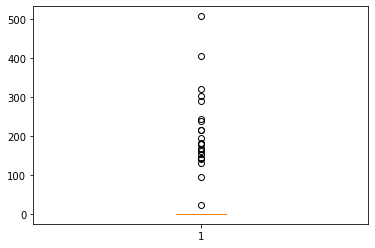

ScreenPorch


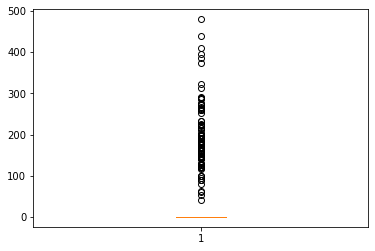

PoolArea


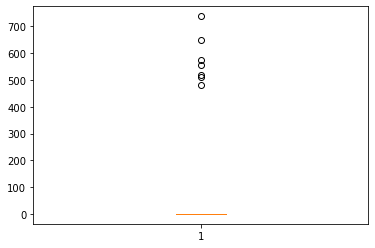

MiscVal


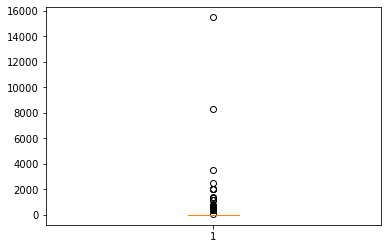

MoSold


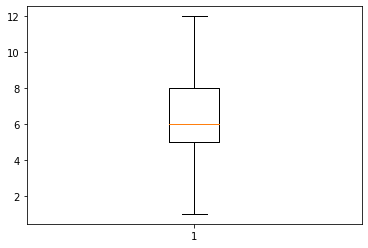

YrSold


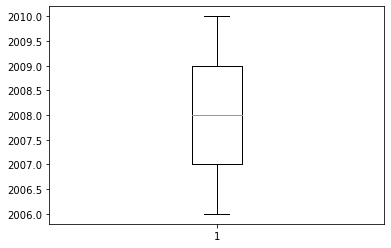

SalePrice


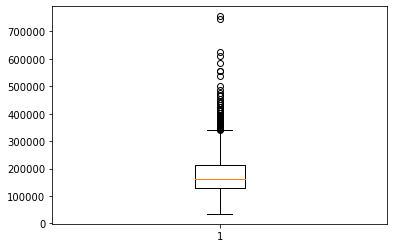

In [12]:
# Checking for Outliers

for i in df.describe().columns:
    print(i)
    plt.boxplot(df[i])
    plt.show()

In [13]:
# Treating Outliers

df.loc[df['LotFrontage'] > 100, 'LotFrontage'] = 100

df.loc[df['LotArea'] > df['LotArea'].quantile(0.75), 'LotArea'] = df['LotArea'].quantile(0.75) + 100
df.loc[df['LotArea'] < df['LotArea'].quantile(0.25), 'LotArea'] = df['LotArea'].quantile(0.25) + 100

df.loc[df['MasVnrArea'] > df['MasVnrArea'].quantile(0.75), 'MasVnrArea'] = df['MasVnrArea'].quantile(0.75) + 100

df.loc[df['BsmtFinSF1'] > 1750, 'BsmtFinSF1'] = 1750

df.loc[df['TotalBsmtSF'] > 2000, 'TotalBsmtSF'] = 2000
df.loc[df['TotalBsmtSF'] < 100, 'TotalBsmtSF'] = 100

df.loc[df['GrLivArea'] > 2850, 'GrLivArea'] = 2850

df.loc[df['GarageArea'] > 900, 'GarageArea'] = 900

df.loc[df['WoodDeckSF'] > 450, 'WoodDeckSF'] = 450

df.loc[df['OpenPorchSF'] > 175, 'OpenPorchSF'] = 175

df.loc[df['BsmtUnfSF'] > 1700, 'BsmtUnfSF'] = 1700

df.loc[df['1stFlrSF'] > 2200, '1stFlrSF'] = 2200

df.loc[df['SalePrice'] > 350000, 'SalePrice'] = 350000

In [14]:
# Dropping these column as they have too many outliers
# BsmtFinSF2 
# LowQualFinSF
# EnclosedPorch
# 3SsnPorch
# ScreenPorch
# MiscVal

df.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal'], axis = 1, inplace = True)

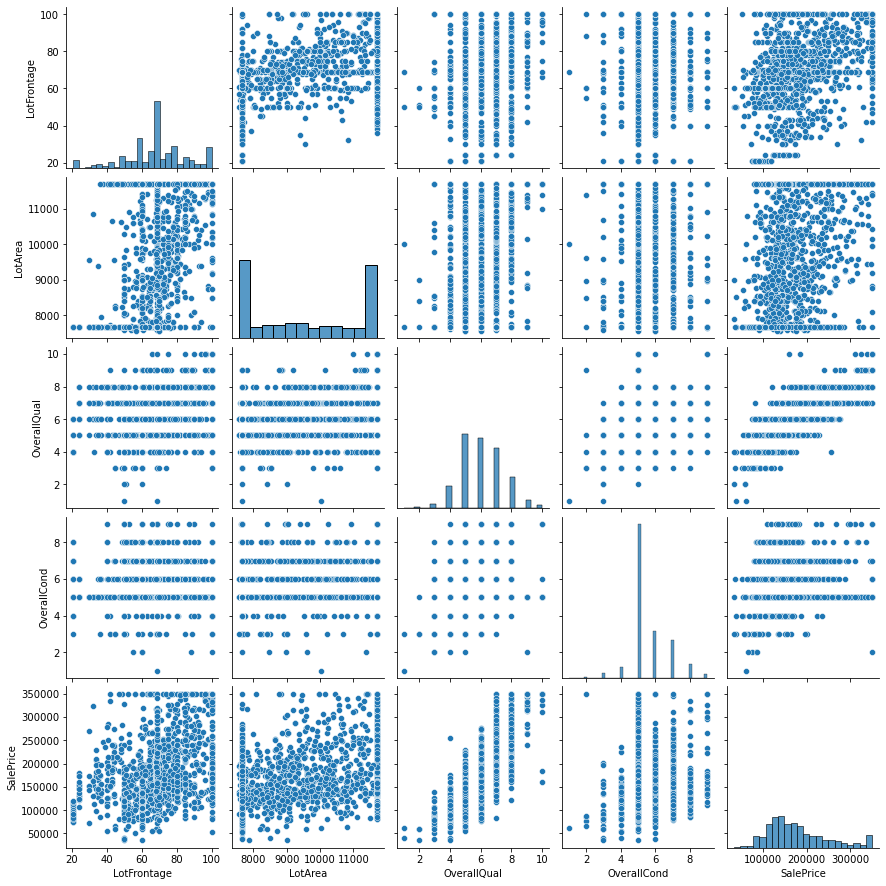

In [15]:
# Checking for linearity of numeric columns

sns.pairplot(df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'SalePrice']])
plt.show()

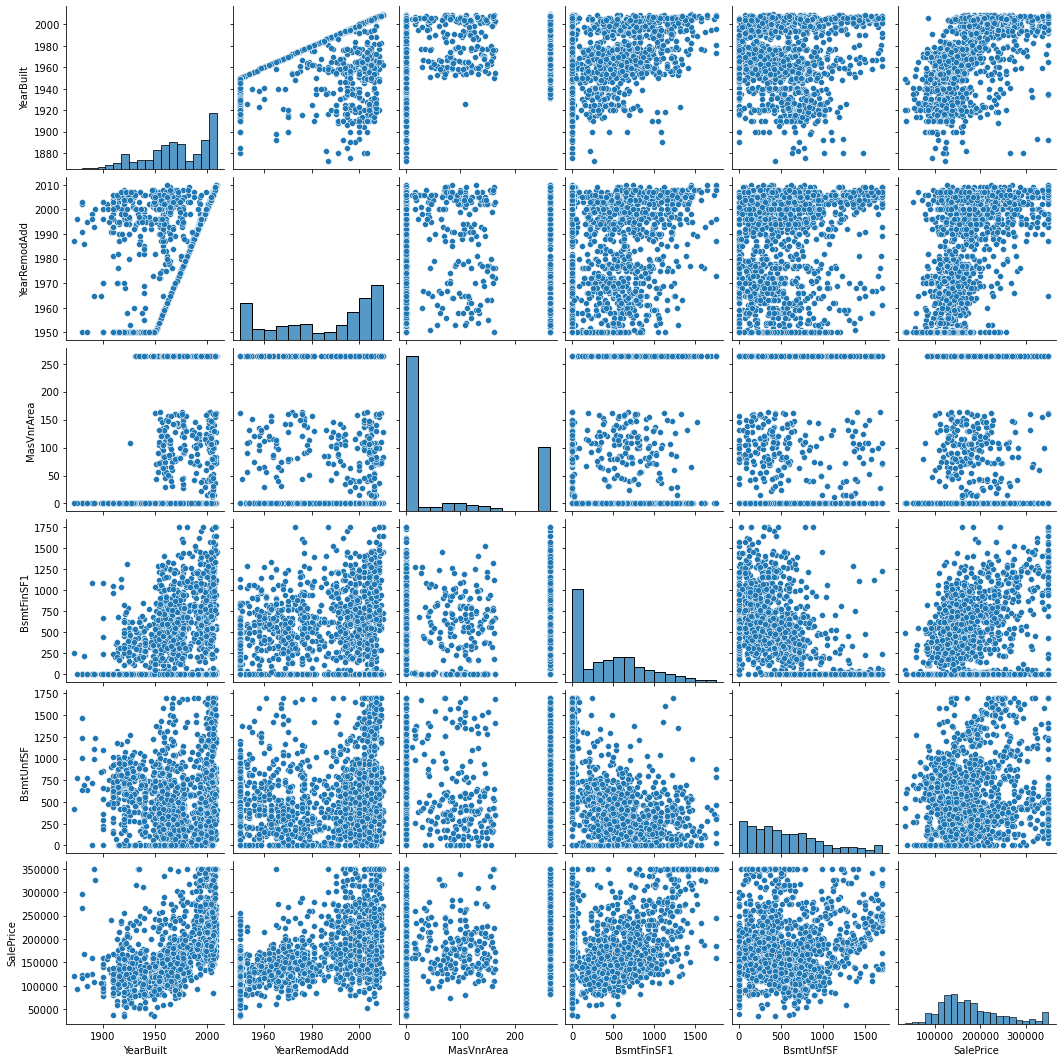

In [16]:
# Checking for linearity of numeric columns
sns.pairplot(df[['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'SalePrice']])
plt.show()

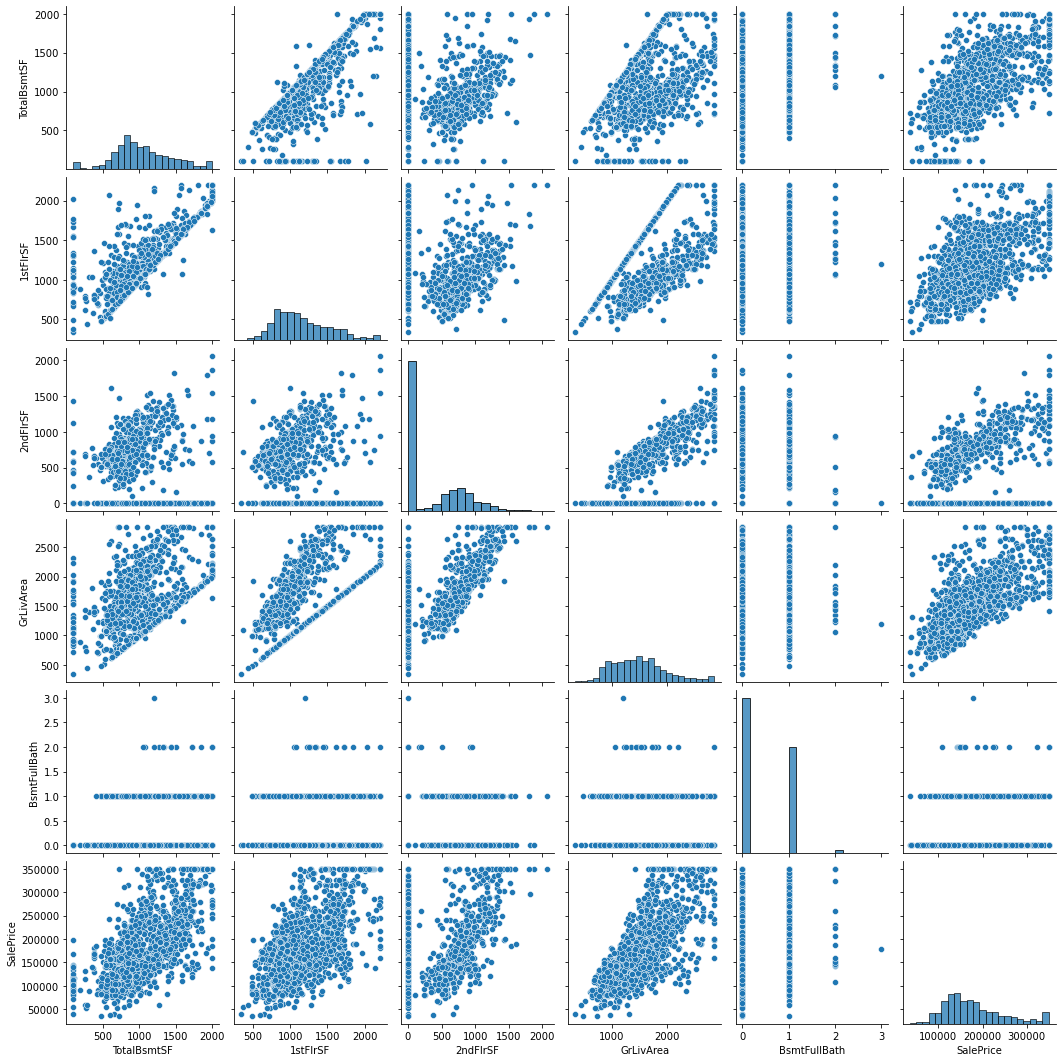

In [17]:
# Checking for linearity of numeric columns
sns.pairplot(df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'SalePrice']])
plt.show()

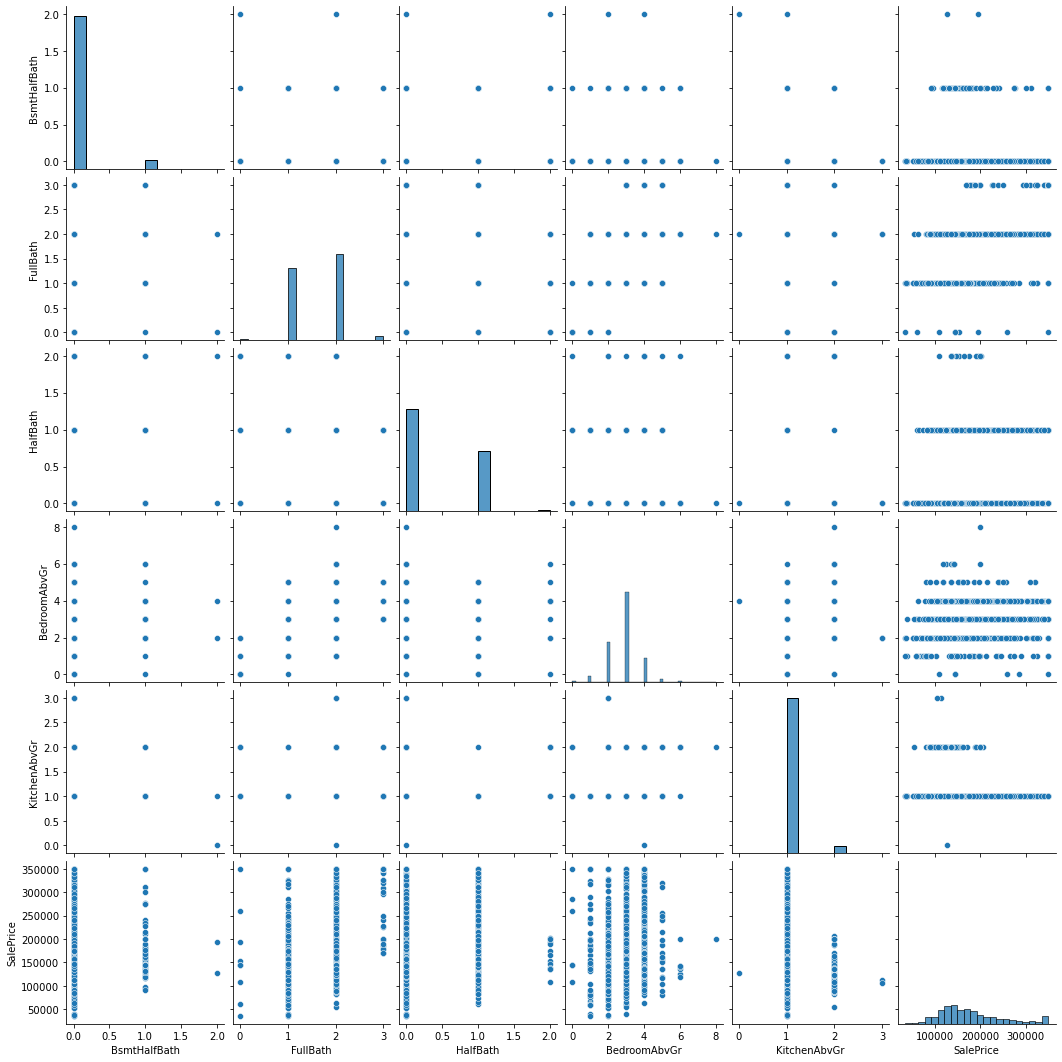

In [18]:
# Checking for linearity of numeric columns
sns.pairplot(df[['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice']])
plt.show()

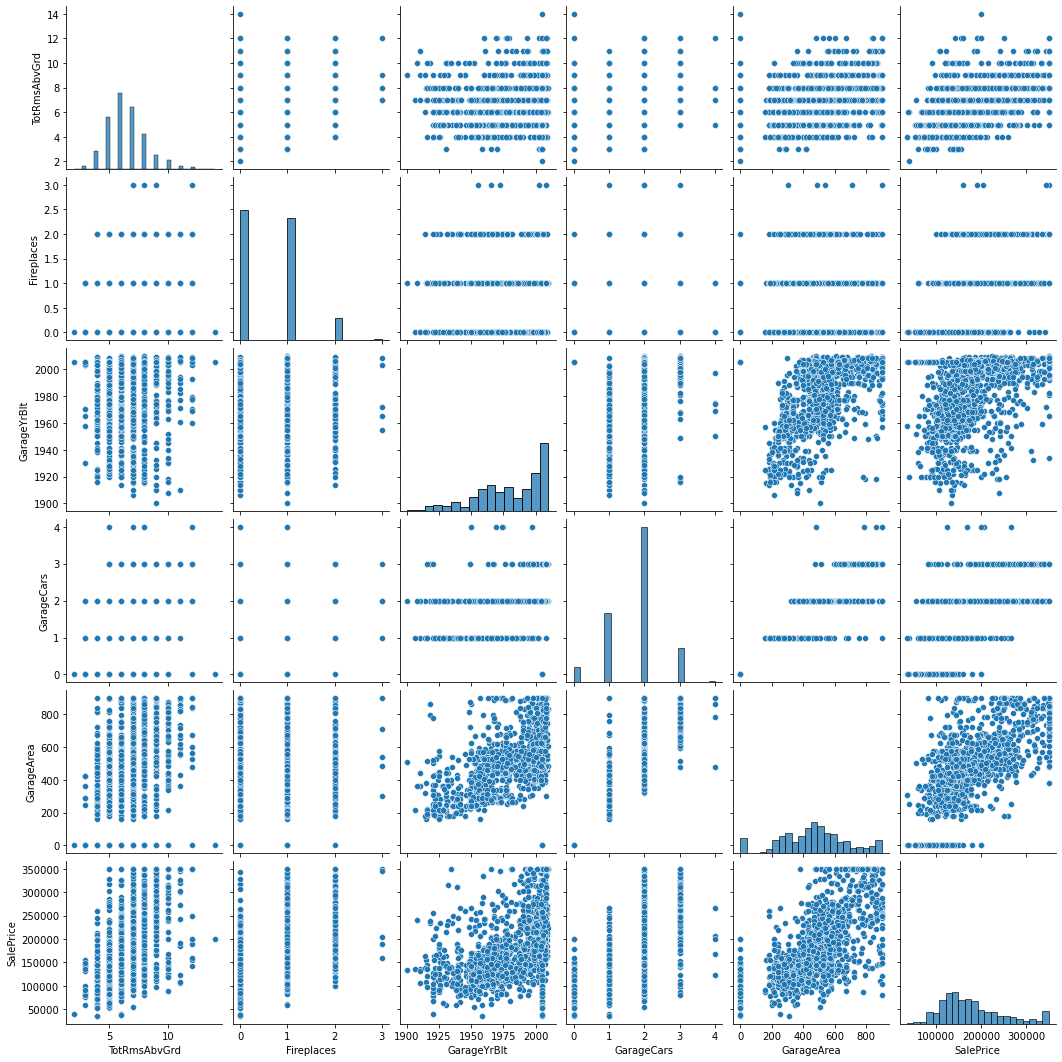

In [19]:
# Checking for linearity of numeric columns
sns.pairplot(df[['TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']])
plt.show()

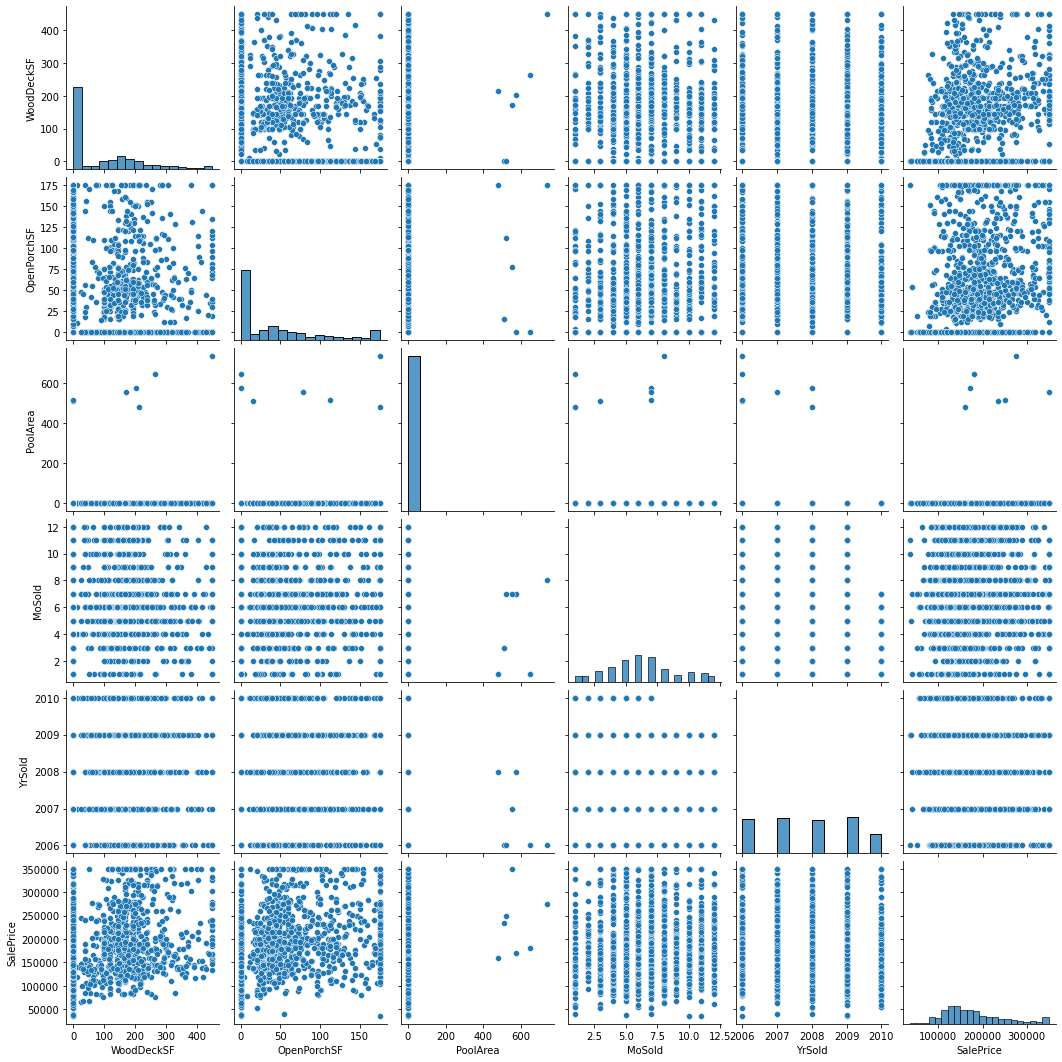

In [20]:
# Checking for linearity of numeric columns
sns.pairplot(df[['WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice']])
plt.show()

##### YearBuilt, lotfrontage, GarageArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea seems to show little linearity with SalePrice

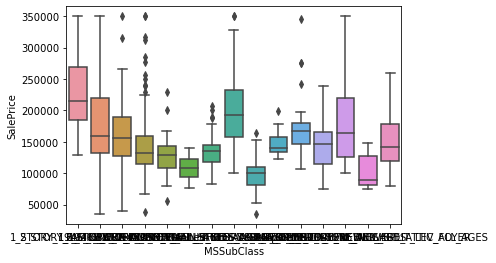

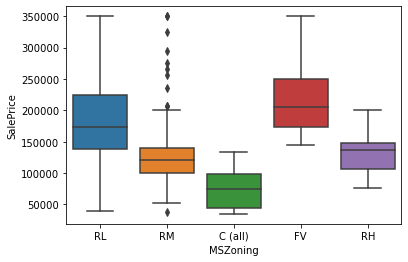

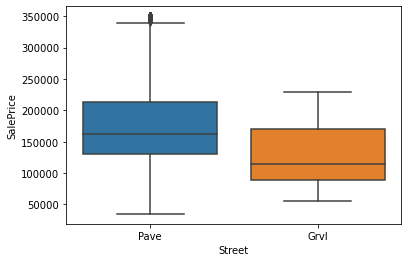

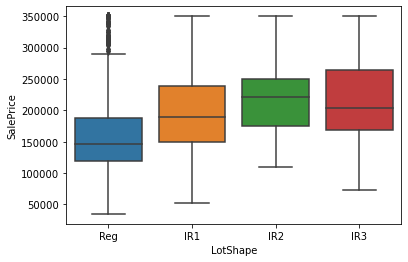

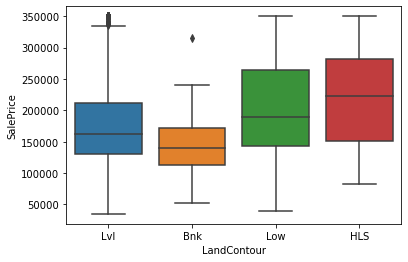

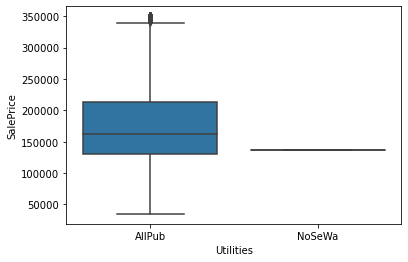

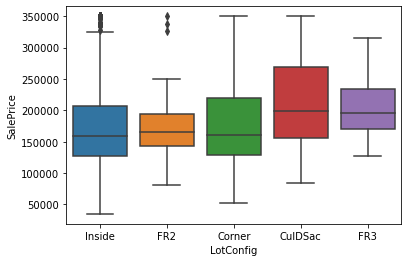

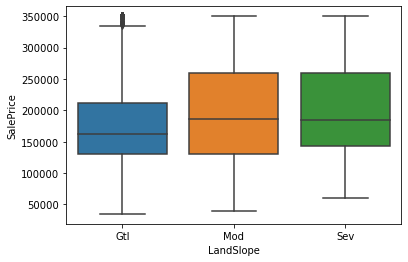

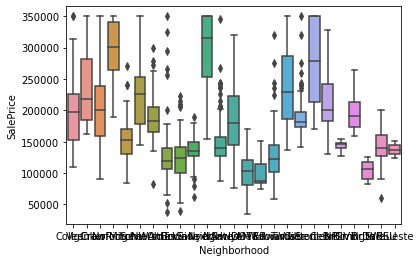

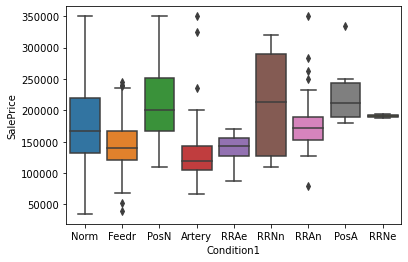

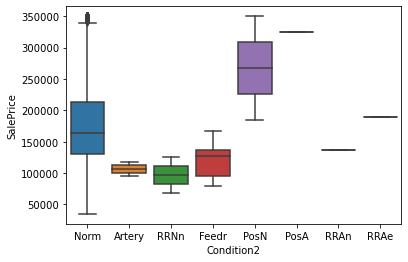

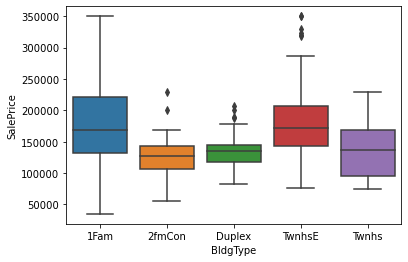

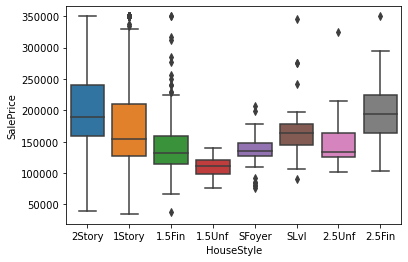

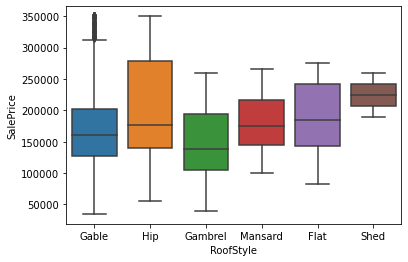

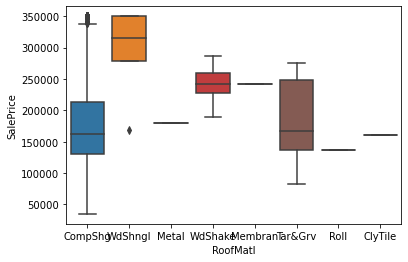

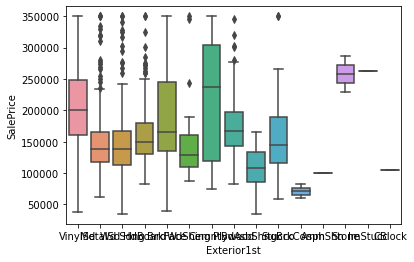

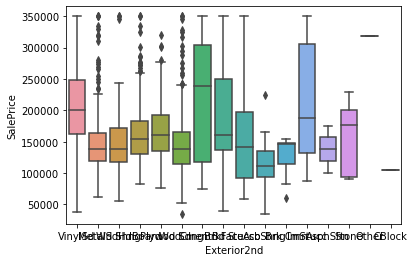

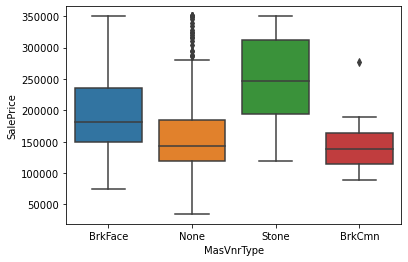

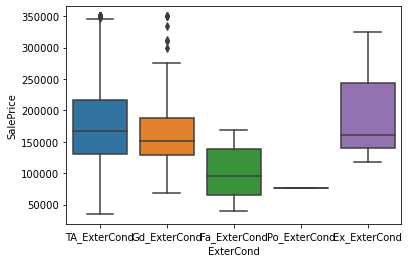

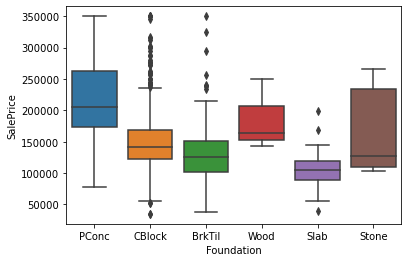

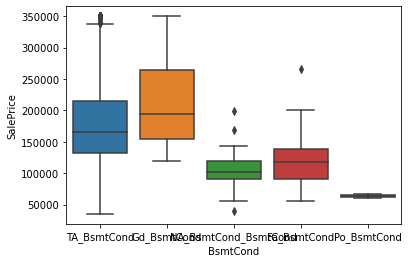

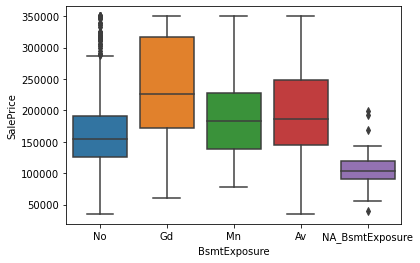

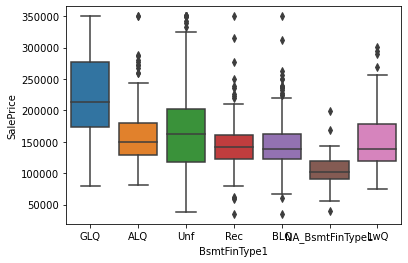

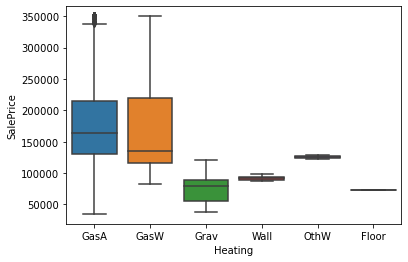

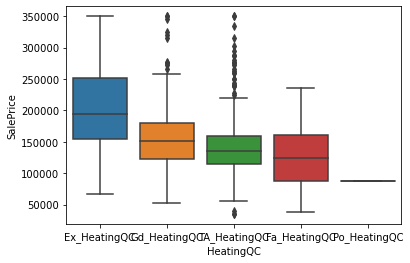

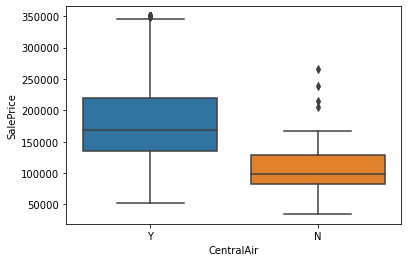

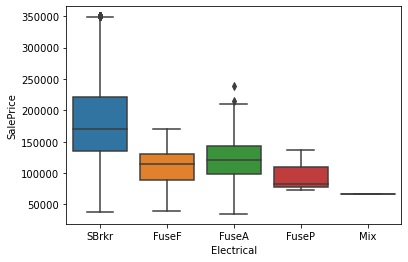

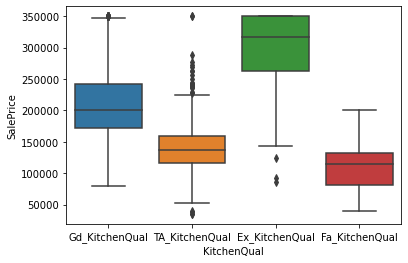

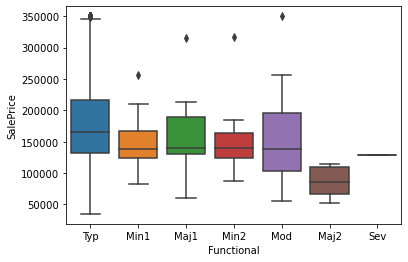

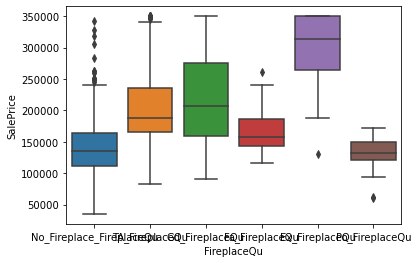

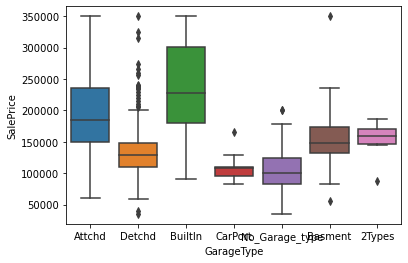

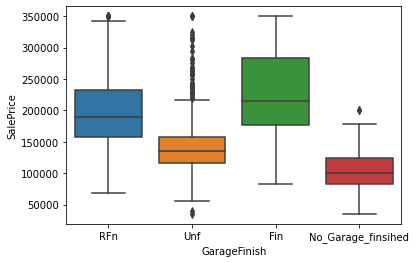

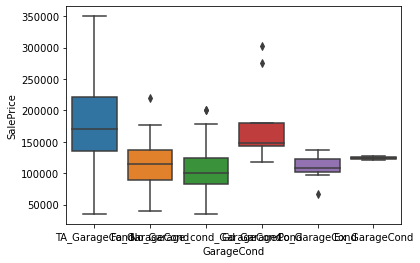

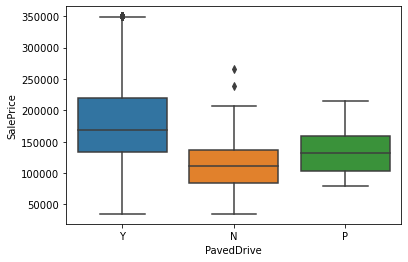

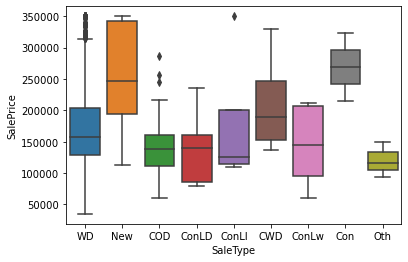

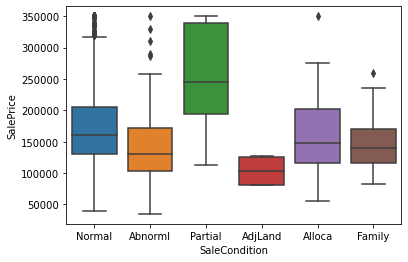

In [21]:
# Checking categorical variables behaviour wrt sales price

for i in df.columns.tolist():
    if i in df.describe().columns.tolist():
        pass
    else:
        sns.boxplot(x = i, y = 'SalePrice', data = df)
        plt.show()

In [22]:
# dropping utilities as it has only row different - AllPub 1459, NoSeWa 1

df.drop(['Utilities'], axis = 1, inplace = True) 

In [23]:
# Convert categorical to numerical

MSSubClass = pd.get_dummies(df['MSSubClass'], drop_first = True)
MSZoning = pd.get_dummies(df['MSZoning'], drop_first = True)
Street = pd.get_dummies(df['Street'], drop_first = True)
LotShape = pd.get_dummies(df['LotShape'], drop_first = True)
LandContour = pd.get_dummies(df['LandContour'], drop_first = True)
LotConfig = pd.get_dummies(df['LotConfig'], drop_first = True)
LandSlope = pd.get_dummies(df['LandSlope'], drop_first = True)
Neighborhood = pd.get_dummies(df['Neighborhood'], drop_first = True)
Condition1 = pd.get_dummies(df['Condition1'], drop_first = True)
Condition2 = pd.get_dummies(df['Condition2'], drop_first = True)
BldgType = pd.get_dummies(df['BldgType'], drop_first = True)
HouseStyle = pd.get_dummies(df['HouseStyle'], drop_first = True)
RoofStyle = pd.get_dummies(df['RoofStyle'], drop_first = True)
RoofMatl = pd.get_dummies(df['RoofMatl'], drop_first = True)
Exterior1st = pd.get_dummies(df['Exterior1st'], drop_first = True)
Exterior2nd = pd.get_dummies(df['Exterior2nd'], drop_first = True)
MasVnrType = pd.get_dummies(df['MasVnrType'], drop_first = True)
ExterCond = pd.get_dummies(df['ExterCond'], drop_first = True)
Foundation = pd.get_dummies(df['Foundation'], drop_first = True)
BsmtCond = pd.get_dummies(df['BsmtCond'], drop_first = True)
BsmtExposure = pd.get_dummies(df['BsmtExposure'], drop_first = True)
BsmtFinType1 = pd.get_dummies(df['BsmtFinType1'], drop_first = True)
Heating = pd.get_dummies(df['Heating'], drop_first = True)
HeatingQC = pd.get_dummies(df['HeatingQC'], drop_first = True)
CentralAir = pd.get_dummies(df['CentralAir'], drop_first = True)
Electrical = pd.get_dummies(df['Electrical'], drop_first = True)
KitchenQual = pd.get_dummies(df['KitchenQual'], drop_first = True)
Functional = pd.get_dummies(df['Functional'], drop_first = True)
FireplaceQu = pd.get_dummies(df['FireplaceQu'], drop_first = True)
GarageType = pd.get_dummies(df['GarageType'], drop_first = True)
GarageFinish = pd.get_dummies(df['GarageFinish'], drop_first = True)
GarageCond = pd.get_dummies(df['GarageCond'], drop_first = True)
PavedDrive = pd.get_dummies(df['PavedDrive'], drop_first = True)
SaleType = pd.get_dummies(df['SaleType'], drop_first = True)
SaleCondition = pd.get_dummies(df['SaleCondition'], drop_first = True)

# Concat the columns
housing_df = pd.concat([df, MSSubClass,
MSZoning,
Street,
LotShape,
LandContour,
LotConfig,
LandSlope,
Neighborhood,
Condition1,
Condition2,
BldgType,
HouseStyle,
RoofStyle,
RoofMatl,
Exterior1st,
Exterior2nd,
MasVnrType,
ExterCond,
Foundation,
BsmtCond,
BsmtExposure,
BsmtFinType1,
Heating,
HeatingQC,
CentralAir,
Electrical,
KitchenQual,
Functional,
FireplaceQu,
GarageType,
GarageFinish,
GarageCond,
PavedDrive,
SaleType,
SaleCondition], axis = 1)

In [24]:
# dropping categorical columns as we have converted to numeric

housing_df.drop(['MSSubClass',
'MSZoning',
'Street',
'LotShape',
'LandContour',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterCond',
'Foundation',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageCond',
'PavedDrive',
'SaleType',
'SaleCondition'], axis=1, inplace=True)

In [25]:
# Train test split

np.random.seed(0)
df_train, df_test = train_test_split(housing_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(housing_df.shape, df_train.shape, df_test.shape)

(1460, 236) (1021, 236) (438, 236)


In [26]:
df_train.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
210,211,67.0,7653.5,5,6,1925,1950,0.00,468,396,...,0,0,0,0,1,0,0,0,1,0
318,319,90.0,9900.0,7,5,1993,1993,264.25,987,360,...,0,0,0,0,1,0,0,0,1,0
239,240,52.0,8741.0,6,4,1945,1950,0.00,94,641,...,0,0,0,0,1,0,0,0,1,0
986,987,59.0,7653.5,6,8,1910,2003,0.00,0,485,...,0,0,0,0,1,0,0,0,1,0
1416,1417,60.0,11340.0,4,6,1885,1950,0.00,0,777,...,0,0,0,0,1,0,0,0,1,0


In [27]:
# Scaling the data

scaler = MinMaxScaler()
col = df.describe().columns.tolist()

df_train[col] = scaler.fit_transform(df_train[col])

In [28]:
# All the numeric values are now scaled between 0 and 1

df_train.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.503460,0.595817,0.486692,0.565676,0.572723,0.719215,0.582305,0.300095,0.253100,0.329730,...,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,0.291287,0.219050,0.395270,0.155529,0.136506,0.219897,0.343843,0.419714,0.247914,0.258056,...,0.054153,0.062500,0.268860,0.054153,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252913,0.493671,0.015923,0.444444,0.500000,0.594203,0.283333,0.000000,0.000000,0.127059,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.505826,0.607595,0.464811,0.555556,0.500000,0.731884,0.733333,0.000000,0.224000,0.271765,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.758739,0.721519,0.953932,0.666667,0.625000,0.927536,0.900000,0.597919,0.406857,0.474118,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Checking the correlation between dependent and independent variables

corr_df = pd.DataFrame(df_train.corr())
corr_df[corr_df['SalePrice'] > 0.5][['SalePrice']].sort_values(['SalePrice'], ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.810465
GrLivArea,0.717852
GarageArea,0.666070
TotalBsmtSF,0.656873
GarageCars,0.654645
1stFlrSF,0.631562
YearBuilt,0.576365
FullBath,0.556984
YearRemodAdd,0.553805


In [30]:
corr_df[corr_df['SalePrice'] < -0.5]

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
TA_KitchenQual,-0.009566,-0.139143,-0.130782,-0.565138,0.073809,-0.474873,-0.562418,-0.215951,-0.119652,-0.231443,...,0.017936,-0.000184,-0.270565,0.054127,0.170446,0.017936,0.066389,0.033342,0.125264,-0.270565
No_Fireplace_FireplaceQu,0.012679,-0.231410,-0.326426,-0.465275,0.069006,-0.244342,-0.200465,-0.266365,-0.184835,-0.126122,...,0.019645,-0.029588,-0.115684,0.055850,0.059140,0.055850,0.069202,0.003350,0.007604,-0.115684


In [31]:
# Splitting y and x variables
y_train = df_train.pop('SalePrice')
X_train = df_train

In [32]:
corr_df['cols'] = corr_df.index
corr_df = corr_df[corr_df['cols'] != 'SalePrice']

### Linear Model

In [33]:
def linear_model_1(col):
    '''
    Function to fit the ols model with features
    '''
    x_train_consider = X_train[col]

    # Add a constant
    X_train_lm = sm.add_constant(x_train_consider)

    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()

    print(lr.summary())
    return x_train_consider, lr, X_train_lm

In [34]:
def vif_cols(x_train_consider):
    '''
    Function to calculate the VIF between columns
    '''
    vif = pd.DataFrame()
    vif['Features'] = x_train_consider.columns
    vif['VIF'] = [variance_inflation_factor(x_train_consider.values, i) for i in range(x_train_consider.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [35]:
cols = corr_df[corr_df['SalePrice'] > 0.5]['cols'].tolist() + corr_df[corr_df['SalePrice'] < -0.5]['cols'].tolist()
x_train_consider, lr, X_train_lm = linear_model_1(cols)
vif_cols(x_train_consider)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     444.6
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        23:28:39   Log-Likelihood:                 1086.8
No. Observations:                1021   AIC:                            -2146.
Df Residuals:                    1007   BIC:                            -2077.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
8,GarageCars,39.30
9,GarageArea,36.54
0,OverallQual,36.13
1,YearBuilt,27.08
3,TotalBsmtSF,23.28
4,1stFlrSF,20.71
6,FullBath,18.80
5,GrLivArea,15.97
7,Fireplaces,8.00
2,YearRemodAdd,7.60


### the VIF is too high for columns, dropping columns to reduce vif < 10

In [36]:
cols = ['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'Fireplaces',
 'GarageArea',
 'PConc',
 'TA_KitchenQual',
 'No_Fireplace_FireplaceQu']
x_train_consider, lr, X_train_lm = linear_model_1(cols)
vif_cols(x_train_consider)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     482.1
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        23:28:39   Log-Likelihood:                 1086.8
No. Observations:                1021   AIC:                            -2148.
Df Residuals:                    1008   BIC:                            -2084.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,OverallQual,36.09
1,YearBuilt,26.63
3,TotalBsmtSF,23.26
4,1stFlrSF,20.69
6,FullBath,18.73
5,GrLivArea,15.96
8,GarageArea,11.13
7,Fireplaces,7.98
2,YearRemodAdd,7.59
11,No_Fireplace_FireplaceQu,6.61


In [37]:
cols = ['YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'Fireplaces',
 'GarageArea',
 'PConc',
 'TA_KitchenQual',
 'No_Fireplace_FireplaceQu']
x_train_consider, lr, X_train_lm = linear_model_1(cols)
vif_cols(x_train_consider)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     567.1
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        23:28:39   Log-Likelihood:                 981.45
No. Observations:                1021   AIC:                            -1945.
Df Residuals:                    1012   BIC:                            -1901.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,GarageArea,9.67
1,TotalBsmtSF,9.38
2,GrLivArea,8.75
3,Fireplaces,6.51
0,YearRemodAdd,6.16
7,No_Fireplace_FireplaceQu,5.29
5,PConc,3.19
6,TA_KitchenQual,2.76


In [38]:
# Pedicting train y
y_train_cnt = lr.predict(X_train_lm)

In [39]:
# test data

# Scaling the test variables

col = df.describe().columns.tolist()
df_test[col] = scaler.transform(df_test[col])

In [40]:
df_test.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.491838,0.610918,0.488332,0.568493,0.570205,0.719195,0.577816,0.317766,0.246676,0.337002,...,0.004566,0.002283,0.095890,0.0,0.860731,0.002283,0.009132,0.013699,0.808219,0.102740
std,0.283993,0.210979,0.395997,0.149493,0.145223,0.216762,0.345295,0.436695,0.246022,0.245860,...,0.067496,0.047782,0.294778,0.0,0.346623,0.047782,0.095235,0.116370,0.394152,0.303966
min,0.002742,0.000000,-0.007293,0.000000,0.125000,0.021739,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243489,0.493671,0.039869,0.444444,0.500000,0.594203,0.266667,0.000000,0.000000,0.149706,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.488691,0.607595,0.437462,0.555556,0.500000,0.724638,0.716667,0.000000,0.206000,0.294412,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.722584,0.746835,1.000000,0.666667,0.625000,0.934783,0.900000,1.000000,0.405571,0.476176,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.998629,1.000000,1.000000,1.000000,1.000000,0.992754,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Splittng x and y variables

y_test = df_test.pop('SalePrice')
X_test = df_test

In [42]:
X_test_mlr = sm.add_constant(X_test)

In [43]:
# Predicting test data
cols = ['const','YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'Fireplaces',
 'GarageArea',
 'PConc',
 'TA_KitchenQual',
 'No_Fireplace_FireplaceQu']
X_test_mlr = X_test_mlr[cols]
y_pred_mlr = lr.predict(X_test_mlr)

In [44]:
print('r2 of test data : ',r2_score(y_test, y_pred_mlr))

r2 of test data :  0.814054511276868


#### r2 of train data - 0.852
#### r2 of test data - 0.814

## Regularization

## Ridge Regression

In [45]:
X_train = X_train[['YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'Fireplaces',
 'GarageArea',
 'PConc',
 'TA_KitchenQual',
 'No_Fireplace_FireplaceQu']]
X_test = X_test[['YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'Fireplaces',
 'GarageArea',
 'PConc',
 'TA_KitchenQual',
 'No_Fireplace_FireplaceQu']]

In [46]:
params = {'alpha' : [.0001, .001, .01, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1,
                    2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]}
ridge = linear_model.Ridge()

folds = 5

# Cross Validation
model_cross_val = GridSearchCV(estimator = ridge,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1
                               )
model_cross_val.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
print(model_cross_val.best_params_)

{'alpha': 0.0001}


In [48]:
alpha = 0.0001
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.10501996  0.26701023  0.37027573  0.11829901  0.18128803  0.04545004
 -0.03706155 -0.01575274]


In [49]:
# Getting r2 values for train & test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print('Train r2 : ', r2_score(y_train, y_pred_train))
print('Test r2 : ', r2_score(y_test, y_pred_test))

Train r2 :  0.817622693634765
Test r2 :  0.8140545058699984


## Lasso Regression

In [50]:
lasso = linear_model.Lasso()

# Cross Validation
model_cross_val = GridSearchCV(estimator = lasso,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1
                               )

model_cross_val.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
print(model_cross_val.best_params_)

{'alpha': 0.0001}


In [52]:
alpha = 0.0001
lasso = linear_model.Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 0.10440233  0.26601295  0.36882926  0.11176373  0.18035915  0.04545007
 -0.03732706 -0.01845253]


In [53]:
# Getting r2 values for train & test

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print('Train r2 : ', r2_score(y_train, y_pred_train))
print('Test r2 : ', r2_score(y_test, y_pred_test))

Train r2 :  0.8176067352365007
Test r2 :  0.8141071561671905


### As we can clearly see, The linear model was over fitting. The train r2 was 0.85 while test was 0.81. But in lasso and rigde regression, the r2 of both train and test was similar. thereby reducingn overfitting

### Let's also see how the results would vary if independent variables were not eliminated before hand

### Linear model

In [54]:
# Train test split

np.random.seed(0)
df_train, df_test = train_test_split(housing_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(housing_df.shape, df_train.shape, df_test.shape)

df_train.head()

scaler = MinMaxScaler()
col = df.describe().columns.tolist()

df_train[col] = scaler.fit_transform(df_train[col])

(1460, 236) (1021, 236) (438, 236)


In [55]:
# Splitting y and x variables
y_train = df_train.pop('SalePrice')
X_train = df_train

In [56]:
cols = X_train.columns.tolist()
x_train_consider, lr, X_train_lm = linear_model_1(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     72.75
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        23:28:46   Log-Likelihood:                 1678.4
No. Observations:                1021   AIC:                            -2907.
Df Residuals:                     796   BIC:                            -1798.
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [57]:
# Pedicting train y
y_train_cnt = lr.predict(X_train_lm)

In [58]:
# test data

# Scaling the test variables

col = df.describe().columns.tolist()
df_test[col] = scaler.transform(df_test[col])

df_test.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.491838,0.610918,0.488332,0.568493,0.570205,0.719195,0.577816,0.317766,0.246676,0.337002,...,0.004566,0.002283,0.095890,0.0,0.860731,0.002283,0.009132,0.013699,0.808219,0.102740
std,0.283993,0.210979,0.395997,0.149493,0.145223,0.216762,0.345295,0.436695,0.246022,0.245860,...,0.067496,0.047782,0.294778,0.0,0.346623,0.047782,0.095235,0.116370,0.394152,0.303966
min,0.002742,0.000000,-0.007293,0.000000,0.125000,0.021739,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243489,0.493671,0.039869,0.444444,0.500000,0.594203,0.266667,0.000000,0.000000,0.149706,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.488691,0.607595,0.437462,0.555556,0.500000,0.724638,0.716667,0.000000,0.206000,0.294412,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.722584,0.746835,1.000000,0.666667,0.625000,0.934783,0.900000,1.000000,0.405571,0.476176,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.998629,1.000000,1.000000,1.000000,1.000000,0.992754,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# Splittng x and y variables

y_test = df_test.pop('SalePrice')
X_test = df_test

X_test_mlr = sm.add_constant(X_test)

In [60]:
# Predicting test data
cols = ['const'] + X_train.columns.tolist()
X_test_mlr = X_test_mlr[cols]
y_pred_mlr = lr.predict(X_test_mlr)

print('r2 of test data : ',r2_score(y_test, y_pred_mlr))

r2 of test data :  0.8792280081725079


## Here, r2 train is 0.95 and r2 test is 0.87; Clearly the model is overfitting

#### let's consider r2 delta as 0.95 - 0.87 = 0.08

### Ridge Regression

In [61]:
params = {'alpha' : [.0001, .001, .01, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1,
                    2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]}
ridge = linear_model.Ridge()

folds = 10

# Cross Validation
model_cross_val = GridSearchCV(estimator = ridge,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1
                               )
model_cross_val.fit(X_train, y_train)

print(model_cross_val.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'alpha': 3}


In [62]:
alpha = 3
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

# Getting r2 values for train & test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print('Train r2 : ', r2_score(y_train, y_pred_train))
print('Test r2 : ', r2_score(y_test, y_pred_test))

[-1.33967765e-02  5.87584025e-03  3.28614869e-02  1.53846392e-01
  1.00189041e-01  4.68674036e-02  4.05701507e-02  1.85378023e-02
  4.19926104e-02 -2.33497101e-02  1.16215550e-01  8.35105090e-02
  8.83726529e-02  2.05233410e-01  3.77931580e-02 -2.14704736e-02
  2.13898749e-02  1.08829503e-02 -1.11509447e-02 -3.96569886e-02
  1.21274503e-02  3.84171095e-04  2.92854710e-03  3.94093180e-02
  7.51677997e-02  1.64300868e-02  1.57202872e-02 -7.46460665e-02
  8.63970539e-03 -2.93310713e-03 -4.15268410e-03  4.31248400e-04
  1.07049412e-02 -1.52372524e-02  9.09179699e-03  2.64397283e-02
  1.87961092e-03 -1.01727284e-03 -4.38865767e-02 -1.44765481e-02
 -2.01681895e-02 -1.47259206e-02 -5.18824803e-03  4.46977150e-03
  3.25363355e-02  3.08538075e-02  3.13740703e-02  1.66021814e-02
  1.33195810e-02 -3.31146942e-03 -1.52196400e-02 -2.67073284e-05
  4.22788139e-02  3.58333786e-02  3.31944558e-02  2.34761783e-02
 -1.34847787e-02 -1.42975780e-02  8.12997707e-04  2.03360053e-02
  2.99238523e-02  4.92617

#### using ridge regression, the r2 delta is 0.93 - 0.89 = 0.04

### Lasso

In [63]:
lasso = linear_model.Lasso()

# Cross Validation
model_cross_val = GridSearchCV(estimator = lasso,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1
                               )

model_cross_val.fit(X_train, y_train)

print(model_cross_val.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'alpha': 0.0001}


In [64]:
alpha = 0.0001
lasso = linear_model.Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

# Getting r2 values for train & test

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print('Train r2 : ', r2_score(y_train, y_pred_train))
print('Test r2 : ', r2_score(y_test, y_pred_test))

[-1.07111626e-02  4.40466159e-03  2.72434133e-02  2.06615646e-01
  1.28623914e-01  7.78769966e-02  3.31727813e-02  1.50016821e-02
  3.05965159e-02 -4.21659616e-02  1.49519264e-01  0.00000000e+00
  4.90850187e-02  3.63957046e-01  3.66547272e-02 -1.60639202e-02
  0.00000000e+00  0.00000000e+00 -1.78796458e-02 -6.79256038e-02
 -8.54472275e-03 -0.00000000e+00  0.00000000e+00  3.33759061e-02
  7.51647248e-02  1.44223603e-02  1.08542958e-02 -1.36420154e-01
  3.20619786e-03 -2.89500787e-03  0.00000000e+00  0.00000000e+00
  3.92620784e-03 -2.12953314e-02  0.00000000e+00  0.00000000e+00
 -3.07719343e-03 -1.12451458e-03 -4.44472202e-02 -1.67978980e-02
 -2.25269329e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.22189480e-02  1.60572306e-02  1.84864785e-02  6.33796827e-04
  2.88131117e-03 -2.85497811e-03 -7.62896156e-03  0.00000000e+00
  3.47855042e-02  3.28410579e-02  2.49107565e-02  2.30161995e-02
 -8.00278649e-03 -0.00000000e+00  2.11979977e-03  1.34395844e-02
  3.16428806e-02  0.00000

#### using lasso regression, the r2 delta is 0.94 - 0.88 = 0.06

In [65]:
compare = pd.DataFrame(index = X_train.columns)

In [66]:
compare['Ridge'] = ridge.coef_
compare['Lasso'] = lasso.coef_

In [67]:
pd.set_option('display.max_rows', None)

In [68]:
compare.sort_values(['Ridge'], ascending = False)

,Ridge,Lasso
GrLivArea,0.205233,0.363957
OverallQual,0.153846,0.206616
TotalBsmtSF,0.116216,0.149519
OverallCond,0.100189,0.128624
2ndFlrSF,0.088373,0.049085
1stFlrSF,0.083511,0.000000
GarageArea,0.075168,0.075165
NoRidge,0.065916,0.063857
StoneBr,0.063367,0.059762
NridgHt,0.060297,0.060466


### These variables are significant in predicting the price of a house

In [69]:
compare.sort_values(['Lasso'], ascending = False).head(10).index.tolist()

['GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'OverallCond',
 'PosA',
 'YearBuilt',
 'GarageArea',
 'NoRidge',
 'Crawfor',
 'NridgHt']

In [70]:
# Linear model

In [71]:
# Train test split

np.random.seed(0)
df_train, df_test = train_test_split(housing_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(housing_df.shape, df_train.shape, df_test.shape)

df_train.head()

scaler = MinMaxScaler()
col = df.describe().columns.tolist()

df_train[col] = scaler.fit_transform(df_train[col])

# Splitting y and x variables
y_train = df_train.pop('SalePrice')
X_train = df_train

cols = ['GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'OverallCond',
 '2ndFlrSF',
 '1stFlrSF',
 'GarageArea',
 'NoRidge',
 'StoneBr',
 'NridgHt']
x_train_consider, lr, X_train_lm = linear_model_1(cols)

# Pedicting train y
y_train_cnt = lr.predict(X_train_lm)

(1460, 236) (1021, 236) (438, 236)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     499.3
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        23:29:17   Log-Likelihood:                 1022.6
No. Observations:                1021   AIC:                            -2023.
Df Residuals:                    1010   BIC:                            -1969.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          

Text(0.5, 0, 'Errors')

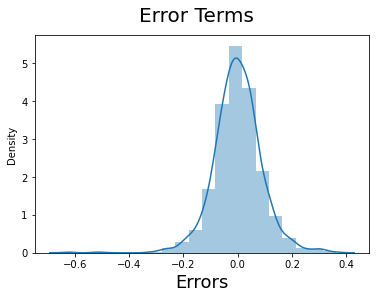

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

#### error terms are normalised

Text(0.5, 0.98, 'Pattern of error terms')

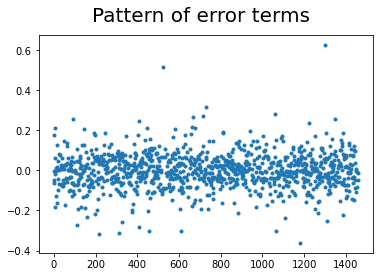

In [73]:
# checking for patterns in error terms - random
res_er = y_train_cnt - y_train
res_er.plot(style='.')
plt.suptitle('Pattern of error terms', fontsize = 20)

#### No pattern observed

In [74]:
# test data

# Scaling the test variables

col = df.describe().columns.tolist()
df_test[col] = scaler.transform(df_test[col])

df_test.describe()

# Splittng x and y variables

y_test = df_test.pop('SalePrice')
X_test = df_test

X_test_mlr = sm.add_constant(X_test)

# Predicting test data
cols = ['const'] + ['GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'OverallCond',
 '2ndFlrSF',
 '1stFlrSF',
 'GarageArea',
 'NoRidge',
 'StoneBr',
 'NridgHt']
X_test_mlr = X_test_mlr[cols]
y_pred_mlr = lr.predict(X_test_mlr)

In [75]:
print('r2 of test data : ',r2_score(y_test, y_pred_mlr))

r2 of test data :  0.8344584192914989


Text(0, 0.5, 'y_pred_mlr')

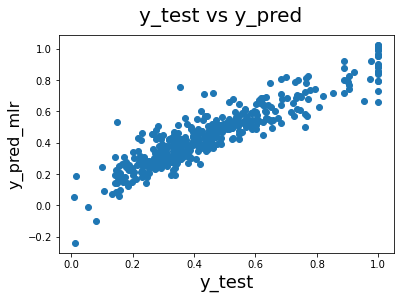

In [76]:
# Checking actuals vs predicted of test data

fig = plt.figure()
plt.scatter(y_test, y_pred_mlr)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred_mlr', fontsize = 16)  

In [77]:
#########

## The 10 noted variables describe the variation in price of a house by 83%

In [78]:
##########

### Optimal value of lambda for 
### Ridge regression - 3
### lasso regression - 0.0001

#-----------------------------------------------------------------------------------------------------------

In [79]:
# solving for pdf questions - 

In [80]:
# doubling alphas

In [81]:
# ridge
alpha = 3 * 2
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

# Getting r2 values for train & test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print('Train r2 : ', r2_score(y_train, y_pred_train))
print('Test r2 : ', r2_score(y_test, y_pred_test))

[-1.36932517e-02  9.69092806e-03  3.42555836e-02  1.33136955e-01
  8.31999664e-02  3.19236281e-02  4.38051349e-02  2.12295261e-02
  4.87811835e-02 -9.99968964e-03  1.00227404e-01  8.89315734e-02
  7.59028838e-02  1.68117090e-01  3.61840938e-02 -1.81848147e-02
  2.87340142e-02  1.63594099e-02 -4.01713241e-03 -3.21324893e-02
  2.52888032e-02  7.04870338e-03  5.67211212e-03  3.98515200e-02
  7.17608914e-02  1.81606847e-02  1.66292407e-02 -4.76610115e-02
  9.31454304e-03 -2.42628007e-03 -5.33608589e-04 -5.20153774e-03
  1.14719961e-02 -9.92883505e-03  7.71557850e-03  2.01969850e-02
  6.37556404e-03  3.88357208e-03 -3.30389448e-02 -1.39806395e-02
 -1.97669721e-02 -1.29618172e-02 -6.93342923e-03  1.28269600e-03
  2.50394223e-02  1.89258520e-02  2.25549472e-02  5.54240228e-03
  9.09253141e-03 -1.97663299e-03 -1.47499478e-02 -7.82726733e-04
  3.72767466e-02  2.98303248e-02  2.76807904e-02  2.46793161e-02
 -1.31662318e-02 -8.77277615e-03  1.15637665e-03  1.80821779e-02
  2.14654467e-02  2.33692

In [82]:
# lasso

alpha = 0.0001 * 2
lasso = linear_model.Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

# Getting r2 values for train & test

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print('Train r2 : ', r2_score(y_train, y_pred_train))
print('Test r2 : ', r2_score(y_test, y_pred_test))

[-1.09078973e-02  3.14458005e-03  2.72422683e-02  2.16025416e-01
  1.18072731e-01  6.96190644e-02  3.49082906e-02  1.33633925e-02
  4.14630261e-02 -2.59416043e-02  1.19300118e-01  0.00000000e+00
  1.55194832e-02  3.70501256e-01  3.77492578e-02 -7.13670107e-03
  0.00000000e+00  3.33834666e-03 -6.99218192e-04 -6.88397785e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  2.25925271e-02
  7.87947723e-02  1.59854948e-02  8.61398228e-03 -1.05321659e-01
  3.10628023e-03 -7.84476072e-04  0.00000000e+00  0.00000000e+00
  1.04883336e-02 -9.61960468e-03  0.00000000e+00  0.00000000e+00
 -3.96050037e-03  0.00000000e+00 -3.56826895e-02 -7.53302232e-03
 -1.56621054e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.32198431e-03  2.12254809e-03  1.77683110e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  3.21428647e-02  3.01376650e-02  1.92005883e-02  2.16849191e-02
 -4.19073437e-03 -0.00000000e+00  2.08426390e-03  9.70419791e-03
  1.16332152e-02  0.00000

In [83]:
compare = pd.DataFrame(index = X_train.columns)

compare['Ridge'] = ridge.coef_
compare['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)

compare.sort_values(['Lasso'], ascending = False)

,Ridge,Lasso
GrLivArea,0.168117,0.370501
OverallQual,0.133137,0.216025
TotalBsmtSF,0.100227,0.119300
OverallCond,0.083200,0.118073
GarageArea,0.071761,0.078795
YearBuilt,0.031924,0.069619
Somerst,0.043464,0.067676
NridgHt,0.057927,0.066688
NoRidge,0.063898,0.066585
Crawfor,0.052854,0.063542


In [84]:
compare.sort_values(['Lasso'], ascending = False).head(10).index.tolist()

['GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'OverallCond',
 'GarageArea',
 'YearBuilt',
 'Somerst',
 'NridgHt',
 'NoRidge',
 'Crawfor']